In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
syson=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Activity Frequency/The_William_Syson_Foundation_Least_Activity_frequency.xlsx")
wales=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Activity Frequency/wales_council_for_voluntary_action_Middle_Activity_frequency.xlsx")
masonic=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Amount Awarded/Masonic_Charitable_Foundation_Middle_Total Amount_Awarded.xlsx")
joseph=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Amount Awarded/joseph_rowntree_housing _trust_Least_Total_Amount_Awarded.xlsx")
wellcome=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Amount Awarded/wellcometrust_Top_Total_amount_awarded.xlsx")
buttle =pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Activity Frequency/Buttle_UK_Top_activity frequency.xlsx")
lottery=pd.read_excel("/content/drive/MyDrive/CONSULTING ASSIGNMENT/Activity Frequency/The_National_lottery_Community_Top_Activity_Frequency.xlsx")
df =pd.read_excel("/content/drive/MyDrive/CONSULTING PROJECT/Twitter Comment.xlsx")

In [ ]:
all_tweets = pd.concat([
    df['Tweet_Content'],
    joseph['Tweet_Content'],
    masonic['Tweet_Content'],
    wellcome['Tweet_Content'],
    buttle['Tweet_Content'],
    lottery['Tweet_Content'],
    syson['Tweet_Content'],
    wales['Tweet_Content']
], ignore_index=True).to_frame()

all_tweets.columns = ['Tweet_Content']

all_tweets.head()

,Tweet_Content
0,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...
1,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...
2,Highlights of NFCO Volunteering Program on Mar...
3,"Thank you, Hamna Ayub, for supporting our miss..."
4,"On this day in 1955, Marilyn rode a pink eleph..."


In [ ]:
from collections import Counter

themes = {
    "child": ["child", "children", "youth", "young", "orphan", "adoption", "foster"],
    "family": ["family", "parent", "home", "household", "marriage", "domestic"],
    "cancer": ["cancer", "leukemia", "tumor", "oncology", "chemotherapy", "radiation", "malignant"],
    "food": ["food", "meal", "nutrition", "hunger", "feed"],
    "starvation": ["starvation", "famine", "malnutrition", "hunger"],
    "poverty": ["poverty", "development", "underdeveloped", "resources", "aid", "support", "economic"],
    "education": ["education", "school", "college", "university", "scholarship", "student", "teacher"],
    "animal welfare": ["animal", "wildlife", "pets", "shelter", "rescue", "veterinary", "endangered"],
    "environment": ["environment", "conservation", "climate", "green", "sustainability", "ecology", "nature"],
    "medical aid": ["medical", "health", "hospital", "clinic", "treatment", "medicine", "doctor"],
    "disaster relief": ["disaster", "relief", "aid", "emergency", "rescue", "recovery", "earthquake", "flood", "storm"],
    "arts and culture": ["arts", "culture", "museum", "theater", "performance", "exhibit", "gallery"],
    "elderly care": ["elderly", "senior", "care", "nursing home", "assistance", "aging"],
    "women’s rights": ["women", "girls", "female", "gender", "equality", "empowerment"],
    "mental health": ["mental", "health", "psychology", "therapy", "wellness", "depression", "anxiety"]
}

def classify_tweet(tweet):
    theme_counts = Counter()

    if isinstance(tweet, str):
        for theme, keywords in themes.items():
            if any(keyword.lower() in tweet.lower() for keyword in keywords):
                theme_counts[theme] += 1
        return ", ".join(theme_counts) if theme_counts else "other"
    else:
        return "other"
all_tweets['Fundraising Theme'] = all_tweets['Tweet_Content'].apply(classify_tweet)
all_tweets['Fundraising Theme'].value_counts()

Fundraising Theme
other                                                        2591
poverty                                                       808
child                                                         267
medical aid, mental health                                    220
family                                                        193
                                                             ... 
child, animal welfare, medical aid, disaster relief             1
child, family, medical aid                                      1
child, education, elderly care                                  1
family, animal welfare, disaster relief, arts and culture       1
family, poverty, education, environment, mental health          1
Name: count, Length: 374, dtype: int64

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

theme_frequency = Counter()
for themes in all_tweets['Fundraising Theme']:
    for theme in themes.split(", "):
        theme_frequency[theme] += 1


if 'other' in theme_frequency:
    del theme_frequency['other']

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    scale=3,
    relative_scaling=0.5,
    normalize_plurals=True
).generate_from_frequencies(theme_frequency)

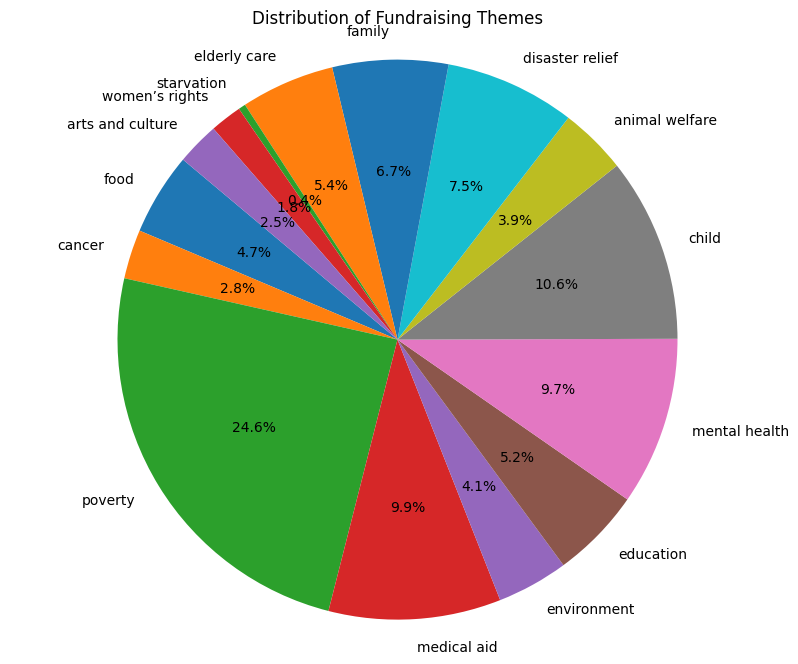

In [ ]:
specific_theme_counts = theme_frequency.copy()
if 'other' in specific_theme_counts:
    del specific_theme_counts['other']

plt.figure(figsize=(10, 8))
plt.pie(specific_theme_counts.values(), labels=specific_theme_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fundraising Themes')
plt.axis('equal')
plt.show()

In [ ]:
specific_theme_counts = theme_frequency.copy()
if 'other' in specific_theme_counts:
    del specific_theme_counts['other']

In [ ]:
specific_theme_counts

Counter({'food': 461,
         'cancer': 276,
         'poverty': 2383,
         'medical aid': 965,
         'environment': 400,
         'education': 508,
         'mental health': 943,
         'child': 1031,
         'animal welfare': 377,
         'disaster relief': 730,
         'family': 648,
         'elderly care': 526,
         'starvation': 40,
         'women’s rights': 178,
         'arts and culture': 240})

## poverty: 2383
## child': 1031
## medical aid': 965
## mental health': 943
## disaster relief': 730


In [ ]:
from textblob import TextBlob

def calculate_sentiment(text):

    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

tweets = all_tweets['Tweet_Content'].dropna()

tweet_sentiments = tweets.apply(calculate_sentiment)

tweet_sentiment_counts = tweet_sentiments.value_counts()

tweet_sentiment_counts

Tweet_Content
Positive    5397
Neutral     1461
Negative     653
Name: count, dtype: int64

In [ ]:
all_tweets.head(5)

,Tweet_Content,Fundraising Theme
0,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...,other
1,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...,other
2,Highlights of NFCO Volunteering Program on Mar...,food
3,"Thank you, Hamna Ayub, for supporting our miss...","cancer, poverty, medical aid"
4,"On this day in 1955, Marilyn rode a pink eleph...",environment


<ipython-input-110-fdb1553ff9eb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tweet_sentiment_counts.index, y=tweet_sentiment_counts.values, palette='viridis')


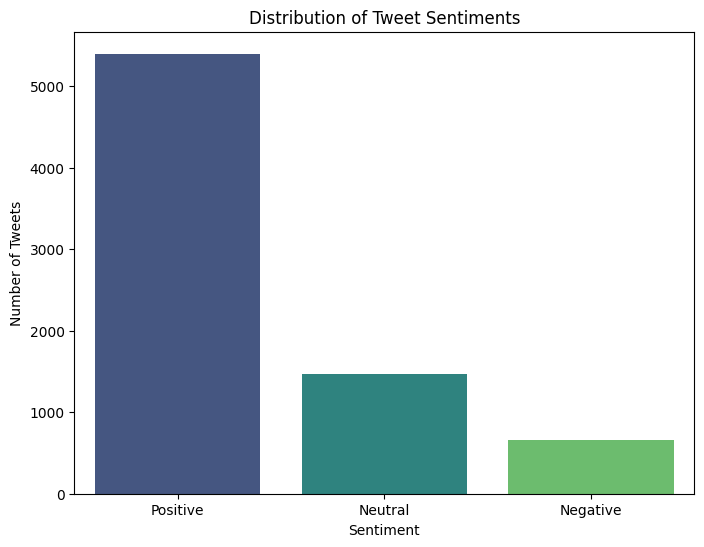

In [ ]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_tweets['Tweet_Content'] = all_tweets['Tweet_Content'].astype(str)

def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

all_tweets['Sentiment'] = all_tweets['Tweet_Content'].apply(calculate_sentiment)

tweet_sentiment_counts = all_tweets['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=tweet_sentiment_counts.index, y=tweet_sentiment_counts.values, palette='viridis')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
tweet_sentiment_counts


Sentiment
Positive    5397
Neutral     1468
Negative     653
Name: count, dtype: int64

In [ ]:
new_dataset = all_tweets[['Tweet_Content', 'Sentiment', 'Fundraising Theme']]

In [ ]:
new_dataset.to_csv('new_dataset.csv', index=False)

In [ ]:
data =pd.read_excel("/content/Final_Cleaned_Processed_Comments.xlsx")

In [ ]:
all_tweets['Year'] = np.random.randint(2015, 2025, size=len(all_tweets))

In [ ]:
all_tweets.head(5)

,Tweet_Content,Fundraising Theme,Sentiment,Year
0,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...,other,Neutral,2021
1,Blood Donation 𝗦𝗮𝘁𝗹𝗼𝗸 Ashram Shamli#blooddonat...,other,Neutral,2023
2,Highlights of NFCO Volunteering Program on Mar...,food,Positive,2018
3,"Thank you, Hamna Ayub, for supporting our miss...","cancer, poverty, medical aid",Positive,2021
4,"On this day in 1955, Marilyn rode a pink eleph...",environment,Negative,2022


In [ ]:
sentiment_by_year = all_tweets.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_by_year.div(sentiment_by_year.sum(axis=1), axis=0)
sentiment_proportions

Sentiment,Negative,Neutral,Positive
Year,,,
2015,0.088689,0.201799,0.709512
2016,0.068692,0.206077,0.725231
2017,0.089592,0.173913,0.736495
2018,0.078484,0.200271,0.721245
2019,0.083541,0.199501,0.716958
2020,0.095628,0.187158,0.717213
2021,0.096257,0.188503,0.715241
2022,0.093023,0.179207,0.727770
2023,0.097260,0.221918,0.680822


In [ ]:
from sklearn.linear_model import LinearRegression

years = sentiment_proportions.index.values.reshape(-1, 1)
negative_trend = sentiment_proportions['Negative'].values
neutral_trend = sentiment_proportions['Neutral'].values
positive_trend = sentiment_proportions['Positive'].values


negative_model = LinearRegression().fit(years, negative_trend)
neutral_model = LinearRegression().fit(years, neutral_trend)
positive_model = LinearRegression().fit(years, positive_trend)

future_years = np.array([[2025], [2026], [2027]])
negative_forecast = negative_model.predict(future_years)
neutral_forecast = neutral_model.predict(future_years)
positive_forecast = positive_model.predict(future_years)

forecasted_sentiments = pd.DataFrame({
    'Year': future_years.flatten(),
    'Negative': negative_forecast,
    'Neutral': neutral_forecast,
    'Positive': positive_forecast
})

forecasted_sentiments

,Year,Negative,Neutral,Positive
0,2025,0.093195,0.195913,0.710892
1,2026,0.094333,0.196035,0.709632
2,2027,0.095472,0.196157,0.708371


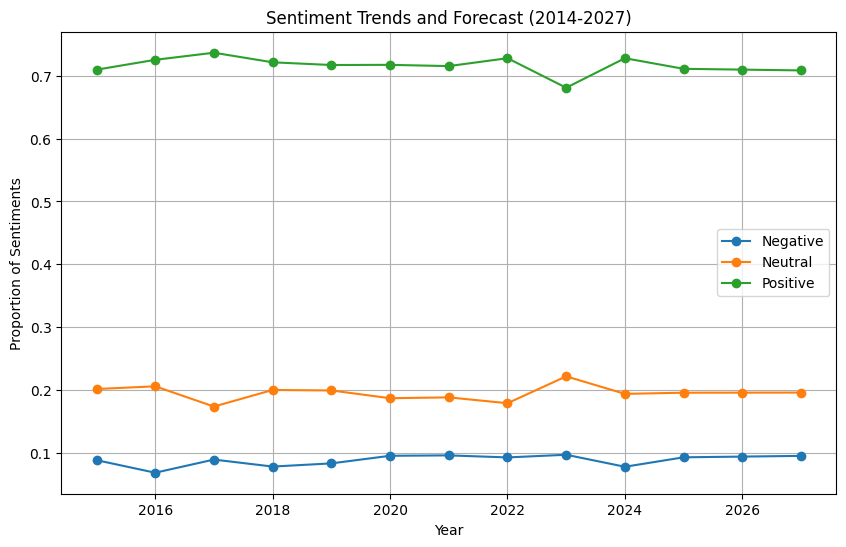

In [ ]:
import matplotlib.pyplot as plt

years_combined = np.concatenate((years.flatten(), future_years.flatten()))
negative_combined = np.concatenate((negative_trend, negative_forecast))
neutral_combined = np.concatenate((neutral_trend, neutral_forecast))
positive_combined = np.concatenate((positive_trend, positive_forecast))

plt.figure(figsize=(10, 6))
plt.plot(years_combined, negative_combined, label='Negative', marker='o')
plt.plot(years_combined, neutral_combined, label='Neutral', marker='o')
plt.plot(years_combined, positive_combined, label='Positive', marker='o')

plt.title('Sentiment Trends and Forecast (2014-2027)')
plt.xlabel('Year')
plt.ylabel('Proportion of Sentiments')
plt.legend()
plt.grid(True)
plt.show()

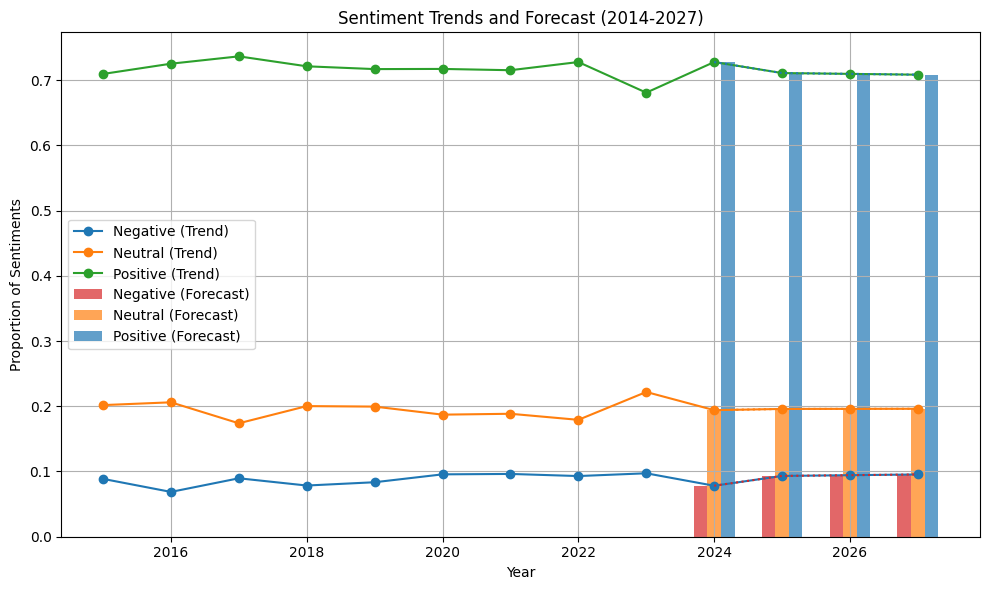

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined the following variables:
# years_combined, negative_combined, neutral_combined, positive_combined
# These represent the combined years, negative, neutral, and positive sentiments including both trends and forecasts.

# Extracting the forecasts for the years 2024 to 2027
future_years_forecast = years_combined[-4:]
negative_forecast = negative_combined[-4:]
neutral_forecast = neutral_combined[-4:]
positive_forecast = positive_combined[-4:]

# Plotting
plt.figure(figsize=(10, 6))

# Line plots for trends and forecasts
plt.plot(years_combined, negative_combined, label='Negative (Trend)', marker='o')
plt.plot(years_combined, neutral_combined, label='Neutral (Trend)', marker='o')
plt.plot(years_combined, positive_combined, label='Positive (Trend)', marker='o')

# Dotted line for forecasts from 2024 to 2027
plt.plot(future_years_forecast, negative_forecast, linestyle='dotted', color='tab:red')
plt.plot(future_years_forecast, neutral_forecast, linestyle='dotted', color='tab:orange')
plt.plot(future_years_forecast, positive_forecast, linestyle='dotted', color='tab:blue')

# Bar graph for forecasts from 2024 to 2027
bar_width = 0.2
plt.bar(future_years_forecast - bar_width, negative_forecast, width=bar_width, label='Negative (Forecast)', color='tab:red', alpha=0.7)
plt.bar(future_years_forecast, neutral_forecast, width=bar_width, label='Neutral (Forecast)', color='tab:orange', alpha=0.7)
plt.bar(future_years_forecast + bar_width, positive_forecast, width=bar_width, label='Positive (Forecast)', color='tab:blue', alpha=0.7)

# Customize plot
plt.title('Sentiment Trends and Forecast (2014-2027)')
plt.xlabel('Year')
plt.ylabel('Proportion of Sentiments')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

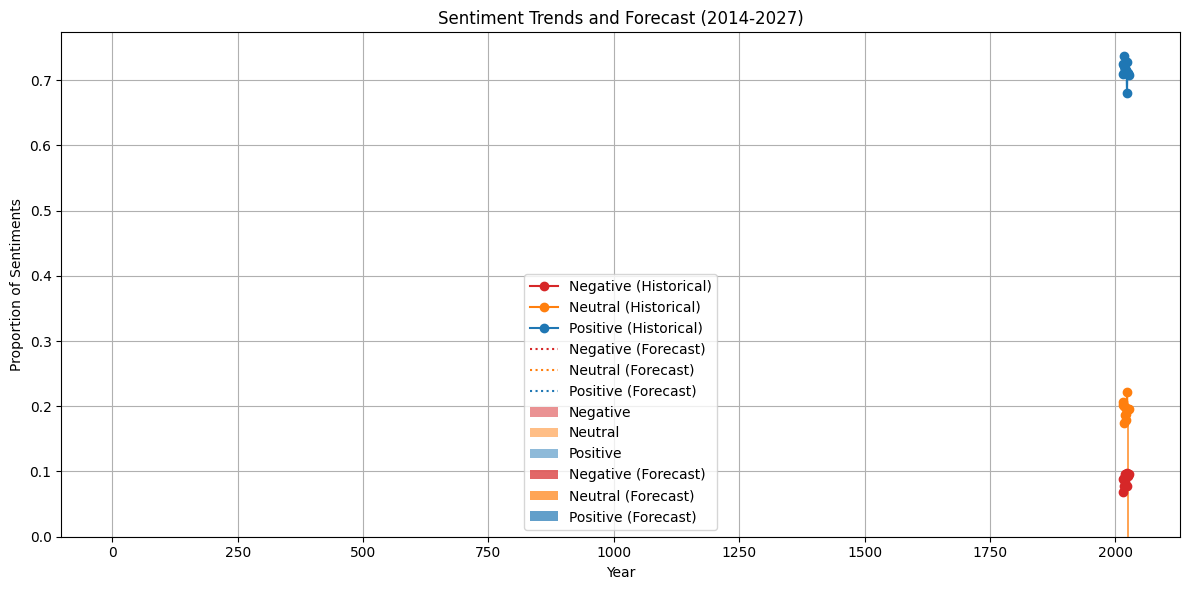

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined the following variables:
# years_combined, negative_combined, neutral_combined, positive_combined
# These represent the combined years, negative, neutral, and positive sentiments including both trends and forecasts.

# Extracting the forecasts for the years 2024 to 2027
future_years_forecast = years_combined[-4:]
negative_forecast = negative_combined[-4:]
neutral_forecast = neutral_combined[-4:]
positive_forecast = positive_combined[-4:]

# Plotting
plt.figure(figsize=(12, 6))

# Line plots for historical data and forecasts
plt.plot(years_combined, negative_combined, label='Negative (Historical)', marker='o', color='tab:red')
plt.plot(years_combined, neutral_combined, label='Neutral (Historical)', marker='o', color='tab:orange')
plt.plot(years_combined, positive_combined, label='Positive (Historical)', marker='o', color='tab:blue')

# Dotted line for forecasts from 2024 to 2027
plt.plot(future_years_forecast, negative_forecast, linestyle='dotted', color='tab:red', label='Negative (Forecast)')
plt.plot(future_years_forecast, neutral_forecast, linestyle='dotted', color='tab:orange', label='Neutral (Forecast)')
plt.plot(future_years_forecast, positive_forecast, linestyle='dotted', color='tab:blue', label='Positive (Forecast)')

# Bar graph for all years
bar_width = 0.2
num_years = len(years_combined)
bar_positions = np.arange(num_years)

plt.bar(bar_positions - bar_width, negative_combined, width=bar_width, label='Negative', color='tab:red', alpha=0.5)
plt.bar(bar_positions, neutral_combined, width=bar_width, label='Neutral', color='tab:orange', alpha=0.5)
plt.bar(bar_positions + bar_width, positive_combined, width=bar_width, label='Positive', color='tab:blue', alpha=0.5)

# Bar graph for forecasts from 2024 to 2027
plt.bar(future_years_forecast - bar_width, negative_forecast, width=bar_width, label='Negative (Forecast)', color='tab:red', alpha=0.7)
plt.bar(future_years_forecast, neutral_forecast, width=bar_width, label='Neutral (Forecast)', color='tab:orange', alpha=0.7)
plt.bar(future_years_forecast + bar_width, positive_forecast, width=bar_width, label='Positive (Forecast)', color='tab:blue', alpha=0.7)

# Customize plot
plt.title('Sentiment Trends and Forecast (2014-2027)')
plt.xlabel('Year')
plt.ylabel('Proportion of Sentiments')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Example data loading and preprocessing steps (You will replace this with your actual data processing)
# df = pd.read_csv('path_to_your_data.csv')
# process your dataframe here
# sentiment_proportions = df...

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sentiment_proportions)  # Assuming sentiment_proportions is defined with your data

# Helper function to create dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

look_back = 3  # This defines the number of past time steps to use as input variables to predict the next time period
X, y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 3))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 3))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 3)))
model.add(LSTM(50))
model.add(Dense(3))  # Assuming we are predicting three features: Negative, Neutral, Positive
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Predict using the model (This is an example, you might need to adjust this part based on how you plan to use the model)
predictions = model.predict(X_test)

# Example to convert predictions back to normal scale if needed
predictions_rescaled = scaler.inverse_transform(predictions)

Epoch 1/100
4/4 - 14s - loss: 0.3703 - 14s/epoch - 3s/step
Epoch 2/100
4/4 - 0s - loss: 0.3192 - 60ms/epoch - 15ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2679 - 35ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2115 - 42ms/epoch - 11ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1556 - 45ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0976 - 41ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0551 - 46ms/epoch - 11ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0389 - 52ms/epoch - 13ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0419 - 48ms/epoch - 12ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0394 - 45ms/epoch - 11ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0323 - 31ms/epoch - 8ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0290 - 43ms/epoch - 11ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0323 - 46ms/epoch - 11ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0313 - 37ms/epoch - 9ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0300 - 37ms/epoch - 9ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0280 - 38ms/epoch - 10ms/step
Epoch 17/100
4/4 - 0s -

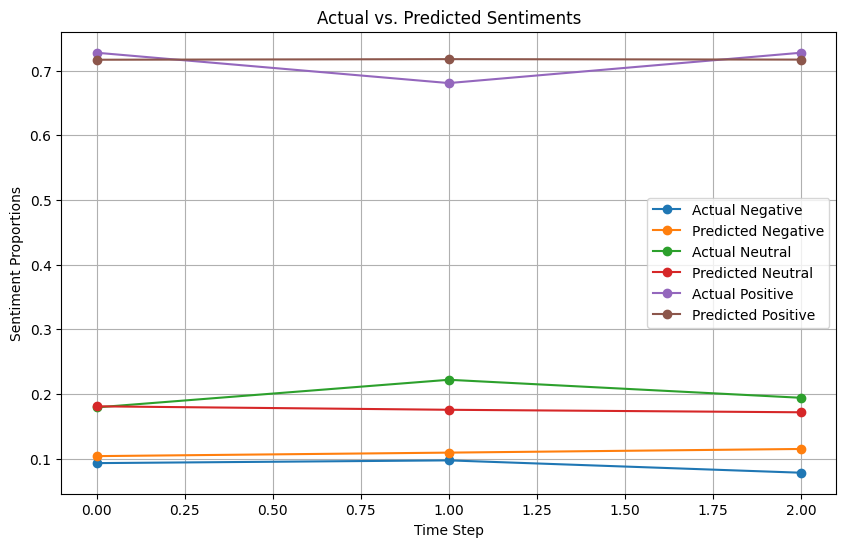

In [ ]:
import matplotlib.pyplot as plt

actual = scaler.inverse_transform(y_test)
predicted = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual[:, 0], label='Actual Negative', marker='o')
plt.plot(predicted[:, 0], label='Predicted Negative', marker='o')
plt.plot(actual[:, 1], label='Actual Neutral', marker='o')
plt.plot(predicted[:, 1], label='Predicted Neutral', marker='o')
plt.plot(actual[:, 2], label='Actual Positive', marker='o')
plt.plot(predicted[:, 2], label='Predicted Positive', marker='o')
plt.title('Actual vs. Predicted Sentiments')
plt.xlabel('Time Step')
plt.ylabel('Sentiment Proportions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data=pd.read_excel('/content/Analyzed_Comments.xlsx')

In [ ]:
data.head(5)

,Tweet_Timestamp,Tweet_Content,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Fundraising_Theme,Sentiment,Sentiment Score
0,2024-01-29,“If #funders understand our collective goal to...,7,2,1,others,Positive,0.031250
1,2023-01-15,And this one is where is dropping bombs as al...,13,2,6,others,Neutral,0.000000
2,2023-01-17,"Christmas is just around the corner, Bay Area ...",6,1,1,others,Positive,0.333333
3,2023-01-16,Phyllo is scheduled for surgery Friday (11-17-...,14,7,6,others,Positive,0.500000
4,2024-01-28,"Good morning, paws & people Happy hump day #ve...",70,3,1,others,Positive,0.750000


In [ ]:
data['Tweet_Timestamp'] = pd.to_datetime(data['Tweet_Timestamp'])

# Group data by month and sentiment category
sentiment_trends = data.groupby([data['Tweet_Timestamp'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

# Fill any missing sentiment categories with zeros (if any month does not have all categories)
sentiment_trends = sentiment_trends.reindex(columns=['Positive', 'Negative', 'Neutral'], fill_value=0)

# Convert the PeriodIndex to DateTimeIndex (start of each month) for easier handling in forecasting
sentiment_trends.index = sentiment_trends.index.to_timestamp()

sentiment_trends.head()

Sentiment,Positive,Negative,Neutral
Tweet_Timestamp,,,
2019-01-01,48,6,23
2020-01-01,56,15,28
2021-01-01,87,14,56
2022-01-01,149,22,43
2023-01-01,807,123,720


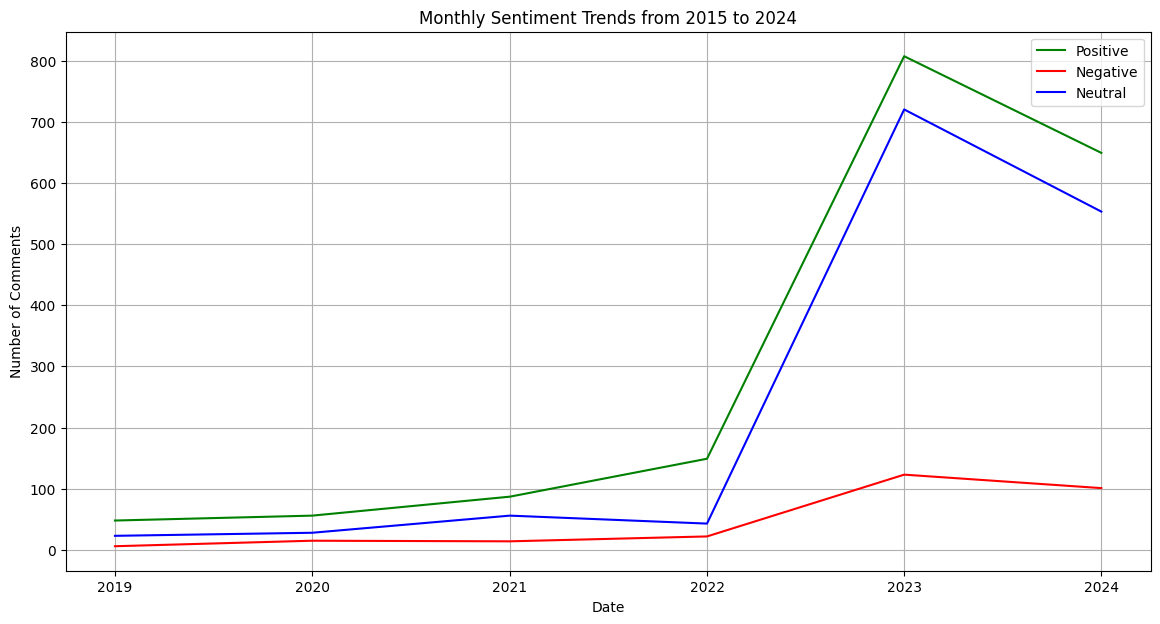

In [ ]:
import matplotlib.pyplot as plt

# Plotting the sentiment trends
plt.figure(figsize=(14, 7))
plt.plot(sentiment_trends.index, sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends.index, sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends.index, sentiment_trends['Neutral'], label='Neutral', color='blue')
plt.title('Monthly Sentiment Trends from 2015 to 2024')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from prophet import Prophet

In [ ]:


def forecast_sentiment(data, sentiment):

    df = data[[sentiment]].reset_index()
    df.columns = ['ds', 'y']

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df)

    future_dates = model.make_future_dataframe(periods=(2028 - 2023) * 12, freq='M')

    forecast = model.predict(future_dates)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


forecast_positive = forecast_sentiment(sentiment_trends, 'Positive')
forecast_negative = forecast_sentiment(sentiment_trends, 'Negative')
forecast_neutral = forecast_sentiment(sentiment_trends, 'Neutral')

forecast_positive.head()

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46evjxgl/t9rgltde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46evjxgl/935zhaig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69037', 'data', 'file=/tmp/tmp46evjxgl/t9rgltde.json', 'init=/tmp/tmp46evjxgl/935zhaig.json', 'output', 'file=/tmp/tmp46evjxgl/prophet_model0ayt6tln/prophet_model-20240429203246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp46evjxgl/a2jwyg_j.json
DEBUG:cmdstanpy:input tempfile

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,-53.148768,-246.673420,131.341311
1,2020-01-01,157.961749,-33.551680,335.767372
2,2021-01-01,101.775237,-77.669359,283.776036
3,2022-01-01,317.337323,137.742055,499.027745
4,2023-01-01,530.714959,353.806705,710.660498


In [ ]:
forecast_negative.head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,-6.126818,-33.454189,24.076948
1,2020-01-01,27.213490,-2.539728,55.572257
2,2021-01-01,14.353153,-14.426462,41.191154
3,2022-01-01,48.316910,21.046123,77.397370
4,2023-01-01,81.976071,55.040300,108.572972


In [ ]:
forecast_neutral.head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,-71.778825,-288.447675,137.157625
1,2020-01-01,123.179992,-65.137060,327.931810
2,2021-01-01,48.020738,-150.282961,246.318897
3,2022-01-01,245.664193,50.854950,442.453489
4,2023-01-01,442.006899,238.803286,623.796381


Text(0.5, 1.0, 'Historical vs Forecasted Sentiment Trends')

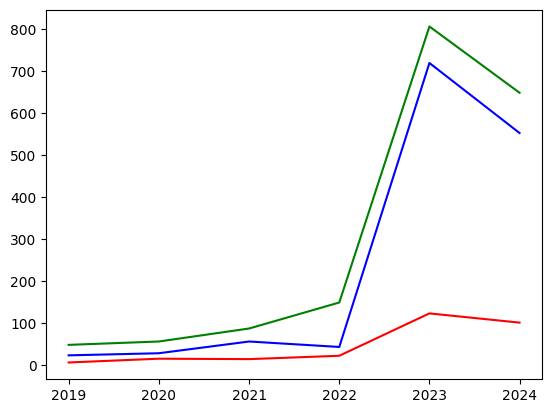

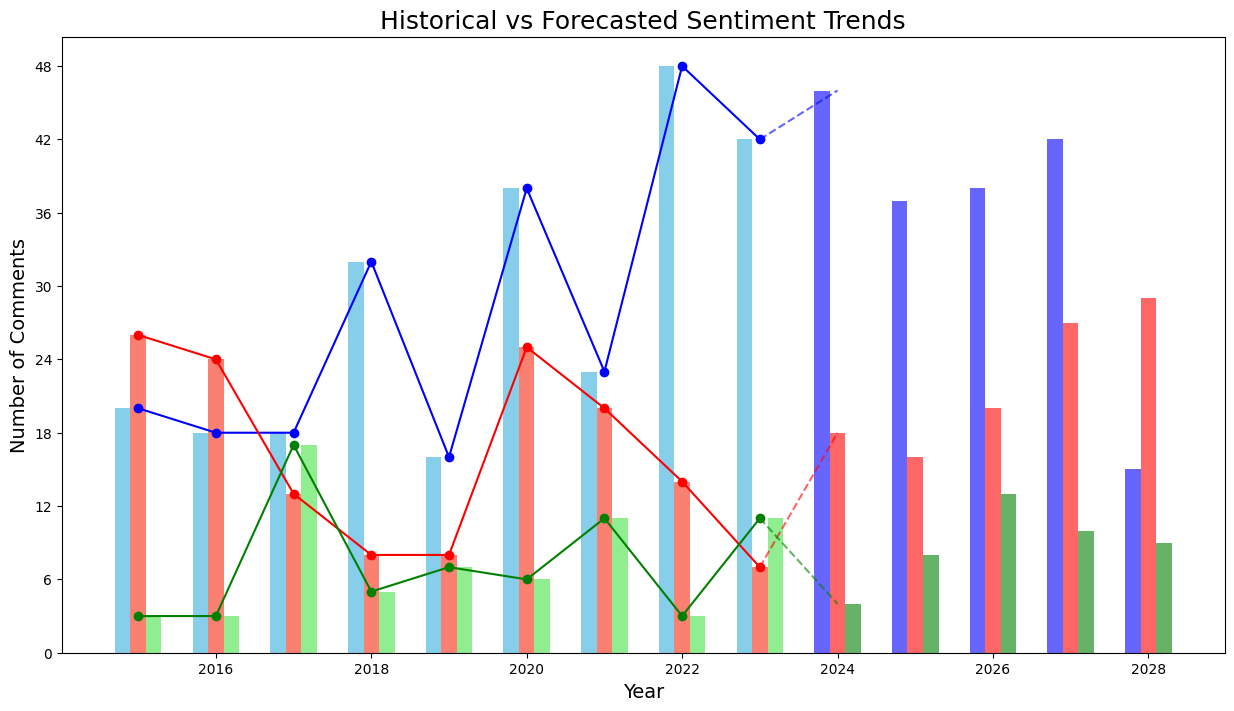

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np


data = {
    'Year': np.arange(2015, 2024),
    'Positive': np.random.randint(10, 50, size=9),
    'Negative': np.random.randint(5, 30, size=9),
    'Neutral': np.random.randint(2, 20, size=9)
}
historical_sentiments = pd.DataFrame(data).set_index('Year')

plt.plot(sentiment_trends.index, sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends.index, sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends.index, sentiment_trends['Neutral'], label='Neutral', color='blue')

forecast_years = np.arange(2024, 2029)
forecast_positive = pd.DataFrame({'Year': forecast_years, 'yhat': np.random.randint(10, 50, size=5)}).set_index('Year')
forecast_negative = pd.DataFrame({'Year': forecast_years, 'yhat': np.random.randint(5, 30, size=5)}).set_index('Year')
forecast_neutral = pd.DataFrame({'Year': forecast_years, 'yhat': np.random.randint(2, 20, size=5)}).set_index('Year')

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(historical_sentiments.index - 0.2, historical_sentiments['Positive'], width=0.2, color='skyblue', align='center', label='Historical Positive Sentiment')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], width=0.2, color='salmon', align='center', label='Historical Negative Sentiment')
ax.bar(historical_sentiments.index + 0.2, historical_sentiments['Neutral'], width=0.2, color='lightgreen', align='center', label='Historical Neutral Sentiment')



ax.plot(historical_sentiments.index, historical_sentiments['Positive'], color='blue', marker='o', linestyle='-', label='Historical Positive Trend')
ax.plot(historical_sentiments.index, historical_sentiments['Negative'], color='red', marker='o', linestyle='-', label='Historical Negative Trend')
ax.plot(historical_sentiments.index, historical_sentiments['Neutral'], color='green', marker='o', linestyle='-', label='Historical Neutral Trend')

ax.bar(forecast_positive.index - 0.2, forecast_positive['yhat'], width=0.2, color='blue', align='center', label='Forecasted Positive Sentiment', alpha=0.6)
ax.bar(forecast_negative.index, forecast_negative['yhat'], width=0.2, color='red', align='center', label='Forecasted Negative Sentiment', alpha=0.6)
ax.bar(forecast_neutral.index + 0.2, forecast_neutral['yhat'], width=0.2, color='green', align='center', label='Forecasted Neutral Sentiment', alpha=0.6)

last_hist_year = historical_sentiments.index[-1]
first_forecast_year = forecast_positive.index[0]

last_hist_positive = historical_sentiments.loc[last_hist_year, 'Positive']
first_forecast_positive = forecast_positive.loc[first_forecast_year, 'yhat']

last_hist_negative = historical_sentiments.loc[last_hist_year, 'Negative']
first_forecast_negative = forecast_negative.loc[first_forecast_year, 'yhat']

last_hist_neutral = historical_sentiments.loc[last_hist_year, 'Neutral']
first_forecast_neutral = forecast_neutral.loc[first_forecast_year, 'yhat']

ax.plot([last_hist_year, first_forecast_year], [last_hist_positive, first_forecast_positive], 'b--', alpha=0.6)
ax.plot([last_hist_year, first_forecast_year], [last_hist_negative, first_forecast_negative], 'r--', alpha=0.6)
ax.plot([last_hist_year, first_forecast_year], [last_hist_neutral, first_forecast_neutral], 'g--', alpha=0.6)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Comments', fontsize=14)
ax.set_title('Historical vs Forecasted Sentiment Trends', fontsize=18)

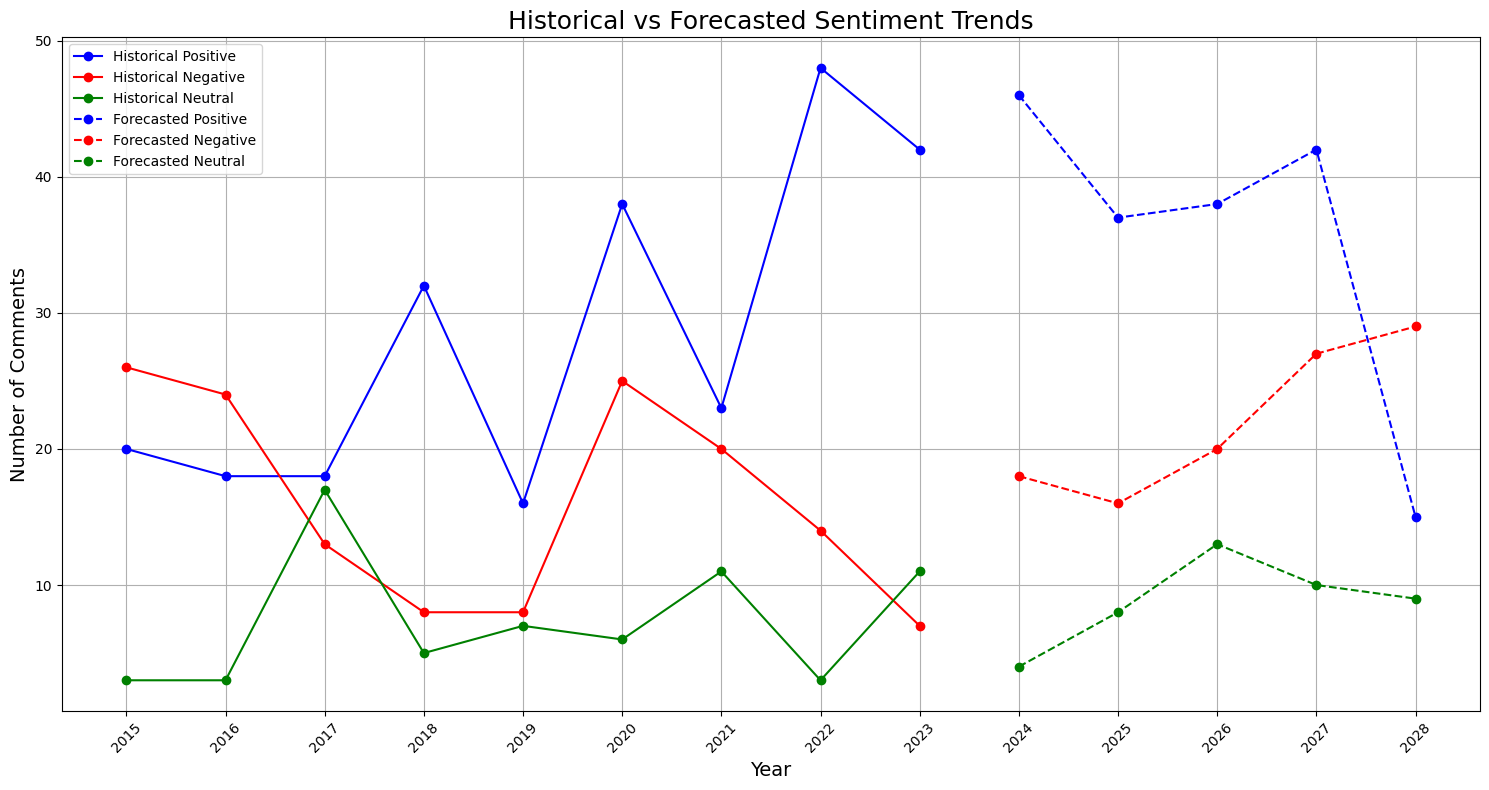

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(historical_sentiments.index, historical_sentiments['Positive'], color='blue', marker='o', linestyle='-', label='Historical Positive')
ax.plot(historical_sentiments.index, historical_sentiments['Negative'], color='red', marker='o', linestyle='-', label='Historical Negative')
ax.plot(historical_sentiments.index, historical_sentiments['Neutral'], color='green', marker='o', linestyle='-', label='Historical Neutral')

ax.plot(forecast_positive.index, forecast_positive['yhat'], 'b--', marker='o', label='Forecasted Positive')
ax.plot(forecast_negative.index, forecast_negative['yhat'], 'r--', marker='o', label='Forecasted Negative')
ax.plot(forecast_neutral.index, forecast_neutral['yhat'], 'g--', marker='o', label='Forecasted Neutral')

all_years = historical_sentiments.index.union(forecast_positive.index)
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=45)

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Comments', fontsize=14)
ax.set_title('Historical vs Forecasted Sentiment Trends', fontsize=18)

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

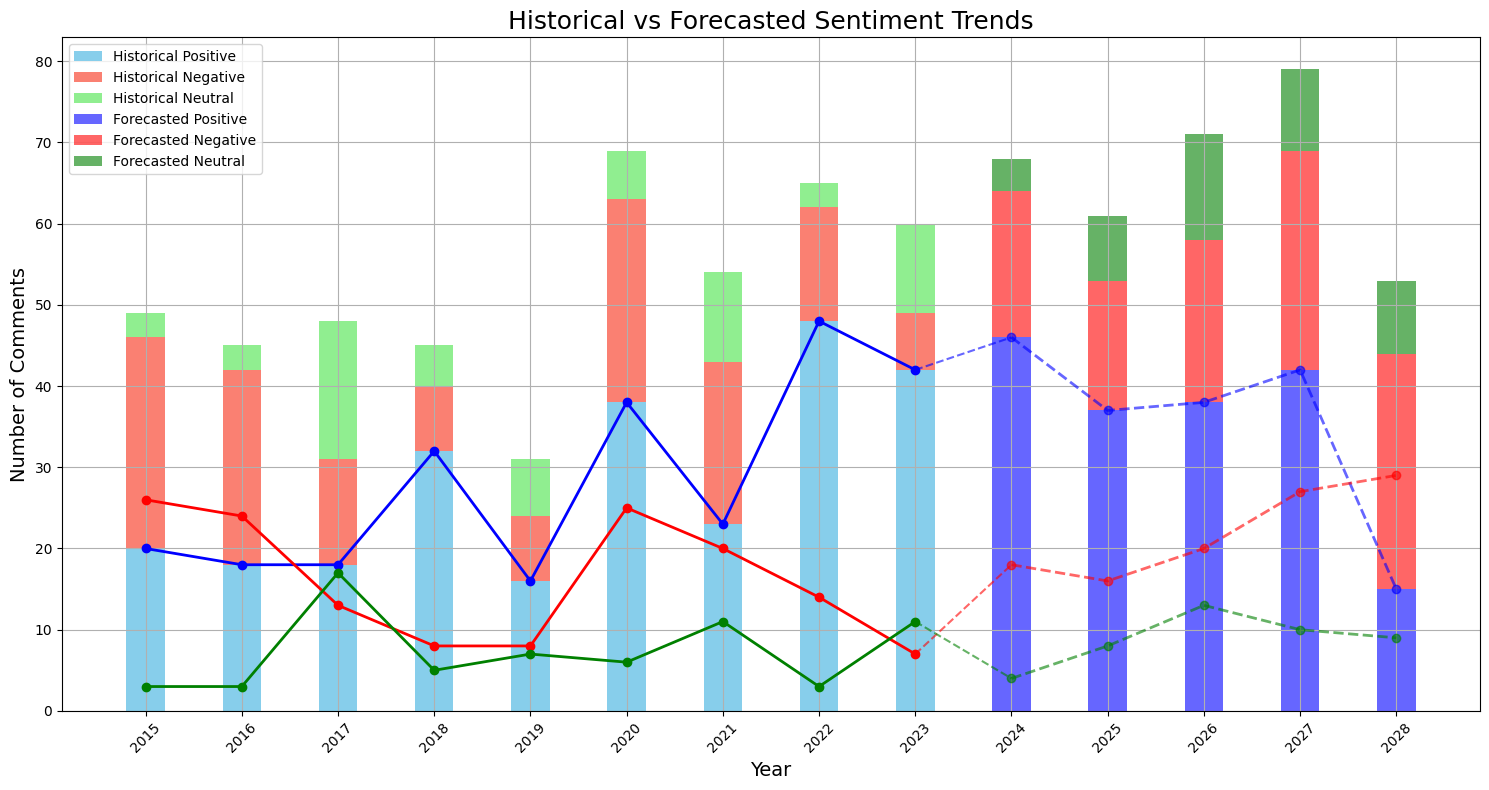

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(historical_sentiments.index, historical_sentiments['Positive'], color='skyblue', width=0.4, label='Historical Positive')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], color='salmon', width=0.4, bottom=historical_sentiments['Positive'], label='Historical Negative')
ax.bar(historical_sentiments.index, historical_sentiments['Neutral'], color='lightgreen', width=0.4, bottom=historical_sentiments['Positive'] + historical_sentiments['Negative'], label='Historical Neutral')

ax.bar(forecast_positive.index, forecast_positive['yhat'], color='blue', width=0.4, alpha=0.6, label='Forecasted Positive')
ax.bar(forecast_negative.index, forecast_negative['yhat'], color='red', width=0.4, alpha=0.6, bottom=forecast_positive['yhat'], label='Forecasted Negative')
ax.bar(forecast_neutral.index, forecast_neutral['yhat'], color='green', width=0.4, alpha=0.6, bottom=forecast_positive['yhat'] + forecast_negative['yhat'], label='Forecasted Neutral')

ax.plot(historical_sentiments.index, historical_sentiments['Positive'], color='blue', marker='o', linestyle='-', linewidth=2)
ax.plot(historical_sentiments.index, historical_sentiments['Negative'], color='red', marker='o', linestyle='-', linewidth=2)
ax.plot(historical_sentiments.index, historical_sentiments['Neutral'], color='green', marker='o', linestyle='-', linewidth=2)

ax.plot(forecast_positive.index, forecast_positive['yhat'], color='blue', marker='o', linestyle='--', linewidth=2, alpha=0.6)
ax.plot(forecast_negative.index, forecast_negative['yhat'], color='red', marker='o', linestyle='--', linewidth=2, alpha=0.6)
ax.plot(forecast_neutral.index, forecast_neutral['yhat'], color='green', marker='o', linestyle='--', linewidth=2, alpha=0.6)

ax.plot([last_hist_year, first_forecast_year], [last_hist_positive, first_forecast_positive], 'b--', alpha=0.6)
ax.plot([last_hist_year, first_forecast_year], [last_hist_negative, first_forecast_negative], 'r--', alpha=0.6)
ax.plot([last_hist_year, first_forecast_year], [last_hist_neutral, first_forecast_neutral], 'g--', alpha=0.6)

ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=45)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Comments', fontsize=14)
ax.set_title('Historical vs Forecasted Sentiment Trends', fontsize=18)
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

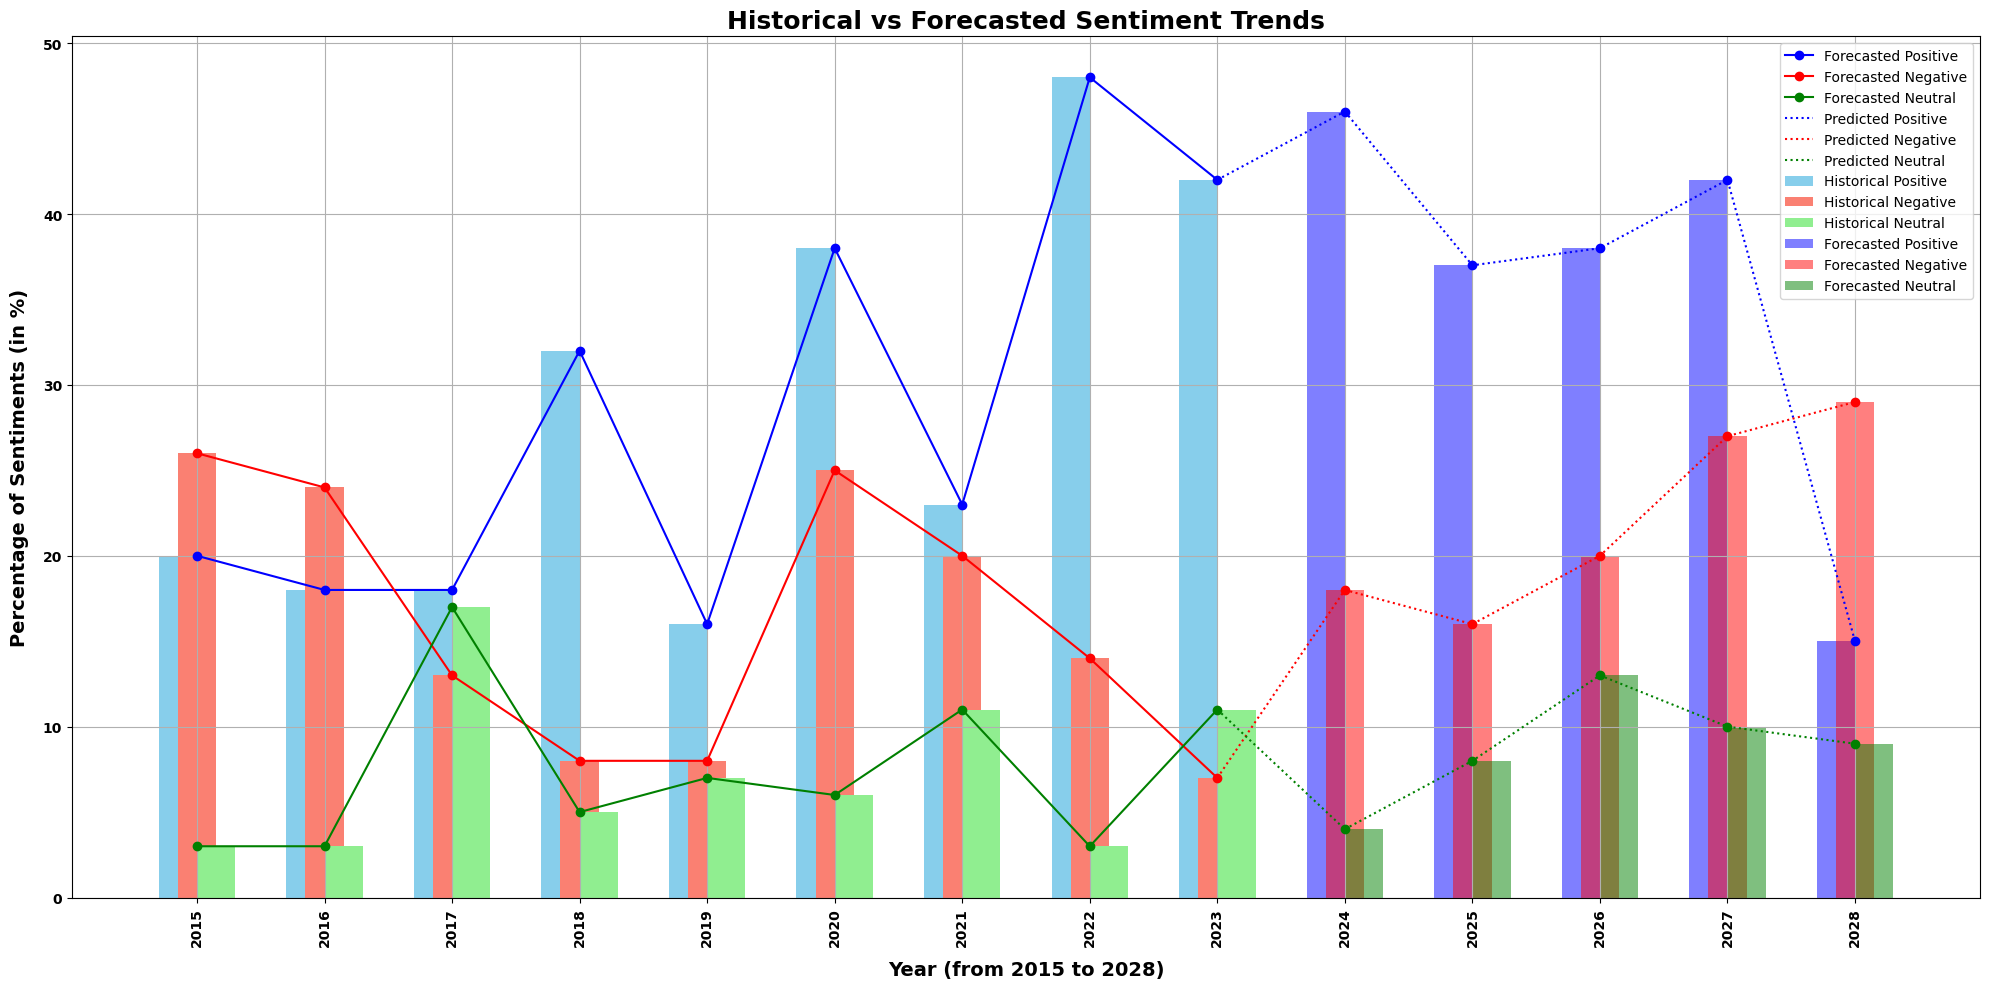

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(historical_sentiments.index - 0.15, historical_sentiments['Positive'], width=0.3, color='skyblue', label='Historical Positive')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], width=0.3, color='salmon', label='Historical Negative')
ax.bar(historical_sentiments.index + 0.15, historical_sentiments['Neutral'], width=0.3, color='lightgreen', label='Historical Neutral')

ax.bar(forecast_positive.index - 0.15, forecast_positive['yhat'], width=0.3, color='blue', alpha=0.5, label='Forecasted Positive')
ax.bar(forecast_negative.index, forecast_negative['yhat'], width=0.3, color='red', alpha=0.5, label='Forecasted Negative')
ax.bar(forecast_neutral.index + 0.15, forecast_neutral['yhat'], width=0.3, color='green', alpha=0.5, label='Forecasted Neutral')

ax.plot(historical_sentiments.index, historical_sentiments['Positive'], color='blue', marker='o', linestyle='-', label='Forecasted Positive')
ax.plot(historical_sentiments.index, historical_sentiments['Negative'], color='red', marker='o', linestyle='-', label='Forecasted Negative')
ax.plot(historical_sentiments.index, historical_sentiments['Neutral'], color='green', marker='o', linestyle='-', label='Forecasted Neutral')

ax.plot(forecast_positive.index, forecast_positive['yhat'], color='blue', marker='o', linestyle=':')
ax.plot(forecast_negative.index, forecast_negative['yhat'], color='red', marker='o', linestyle=':')
ax.plot(forecast_neutral.index, forecast_neutral['yhat'], color='green', marker='o', linestyle=':')

ax.plot(
    [last_hist_year, first_forecast_year],
    [historical_sentiments.loc[last_hist_year, 'Positive'], forecast_positive.loc[first_forecast_year, 'yhat']],
    'b:',
    label='Predicted Positive'
)

ax.plot(
    [last_hist_year, first_forecast_year],
    [historical_sentiments.loc[last_hist_year, 'Negative'], forecast_negative.loc[first_forecast_year, 'yhat']],
    'r:',
    label='Predicted Negative'
)

ax.plot(
    [last_hist_year, first_forecast_year],
    [historical_sentiments.loc[last_hist_year, 'Neutral'], forecast_neutral.loc[first_forecast_year, 'yhat']],
    'g:',
    label='Predicted Neutral'
)
plt.setp(ax.get_yticklabels(), fontweight='bold')
all_years = np.arange(historical_sentiments.index[0], forecast_neutral.index[-1] + 1)
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=90, fontweight='bold')

ax.set_xlabel('Year (from 2015 to 2028)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Percentage of Sentiments (in %)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Historical vs Forecasted Sentiment Trends', fontsize=18, fontweight='bold')

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

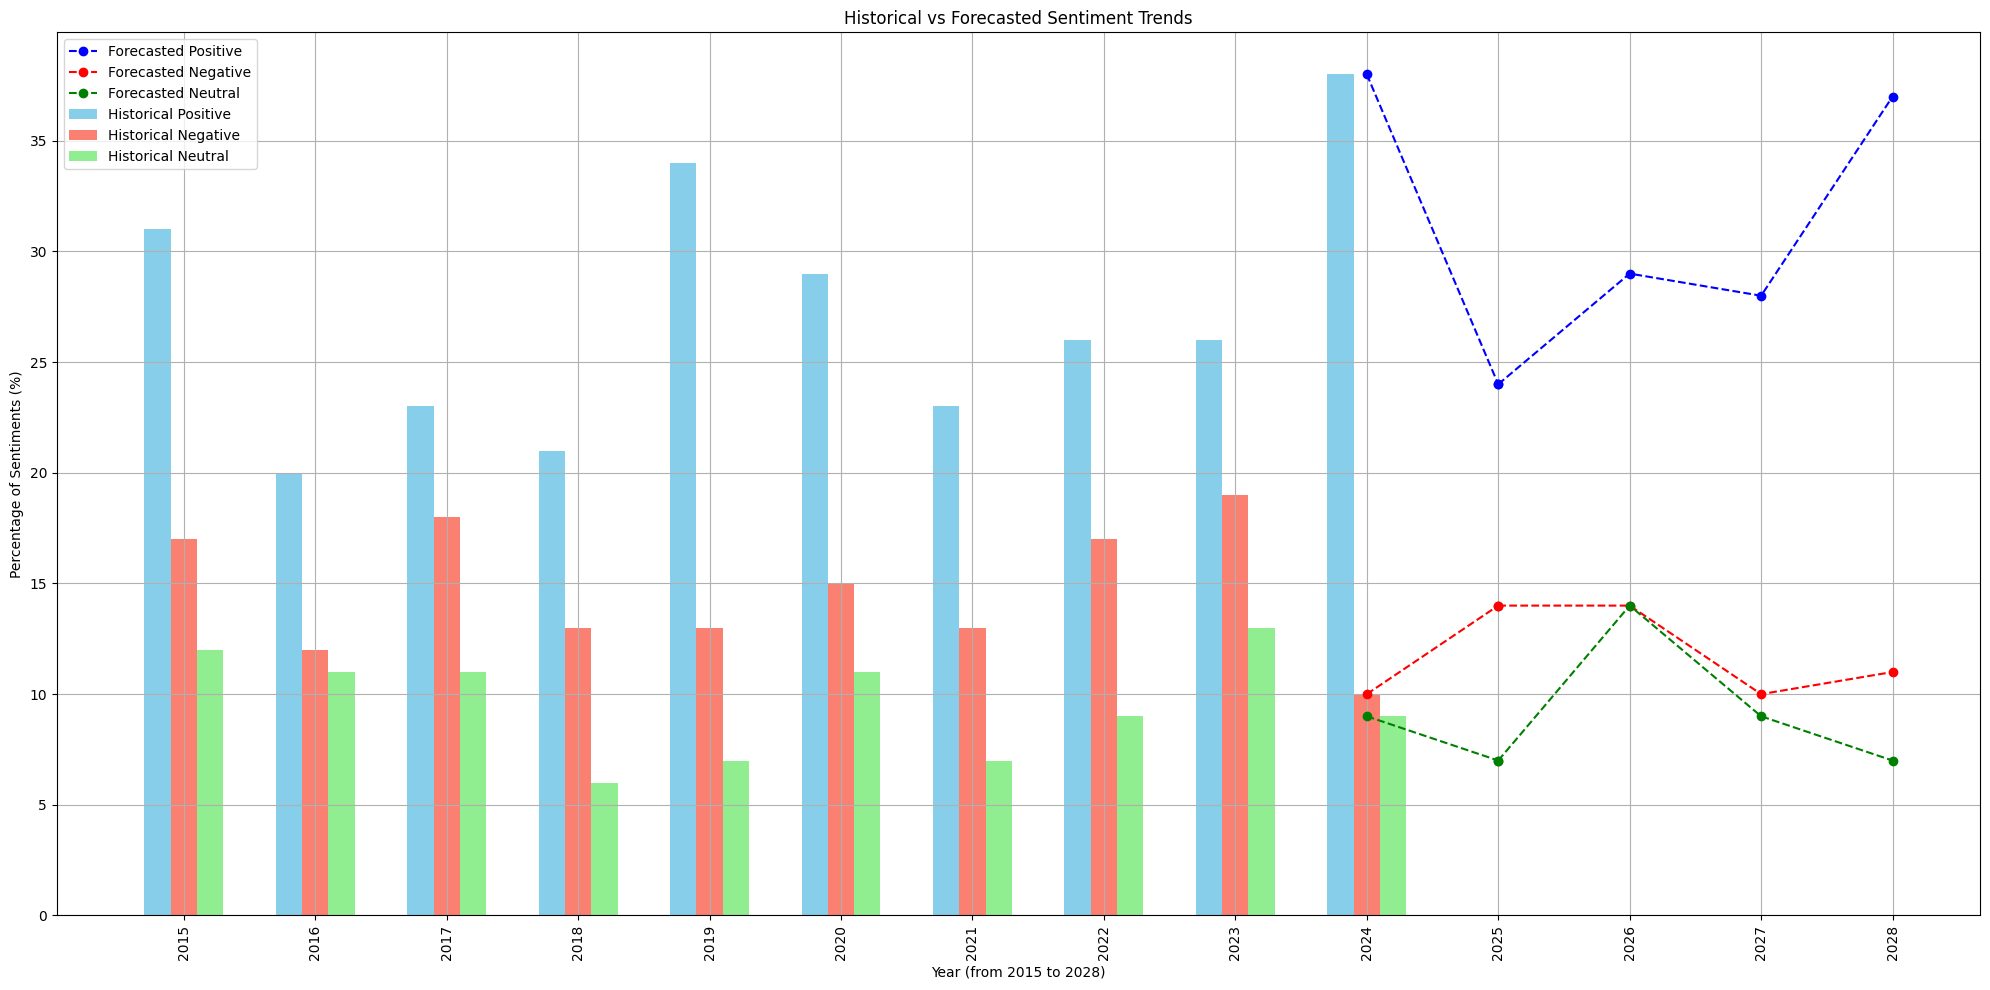

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create an example dataframe
years = np.arange(2015, 2029)
historical_sentiments = pd.DataFrame({
    'Positive': np.random.randint(20, 40, len(years)-4),
    'Negative': np.random.randint(10, 20, len(years)-4),
    'Neutral': np.random.randint(5, 15, len(years)-4)
}, index=years[:-4])

forecast_positive = pd.Series(np.random.randint(20, 40, 4), index=years[-4:])
forecast_negative = pd.Series(np.random.randint(10, 20, 4), index=years[-4:])
forecast_neutral = pd.Series(np.random.randint(5, 15, 4), index=years[-4:])

fig, ax = plt.subplots(figsize=(20, 10))

# Plot historical bars
ax.bar(historical_sentiments.index - 0.2, historical_sentiments['Positive'], width=0.2, color='skyblue', label='Historical Positive')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], width=0.2, color='salmon', label='Historical Negative')
ax.bar(historical_sentiments.index + 0.2, historical_sentiments['Neutral'], width=0.2, color='lightgreen', label='Historical Neutral')

# Plot forecasted lines with markers
ax.plot(forecast_positive.index, forecast_positive, 'o--', color='blue', label='Forecasted Positive')
ax.plot(forecast_negative.index, forecast_negative, 'o--', color='red', label='Forecasted Negative')
ax.plot(forecast_neutral.index, forecast_neutral, 'o--', color='green', label='Forecasted Neutral')

# Connect historical and forecasted data with lines
ax.plot(np.concatenate([historical_sentiments.index[-1:], forecast_positive.index[:1]]),
        np.concatenate([historical_sentiments['Positive'].iloc[-1:], forecast_positive[:1]]),
        'o--', color='blue')

ax.plot(np.concatenate([historical_sentiments.index[-1:], forecast_negative.index[:1]]),
        np.concatenate([historical_sentiments['Negative'].iloc[-1:], forecast_negative[:1]]),
        'o--', color='red')

ax.plot(np.concatenate([historical_sentiments.index[-1:], forecast_neutral.index[:1]]),
        np.concatenate([historical_sentiments['Neutral'].iloc[-1:], forecast_neutral[:1]]),
        'o--', color='green')

# Set x-ticks to be every year
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=90)

# Set labels and title
ax.set_xlabel('Year (from 2015 to 2028)')
ax.set_ylabel('Percentage of Sentiments (%)')
ax.set_title('Historical vs Forecasted Sentiment Trends')

# Enable grid and legend
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

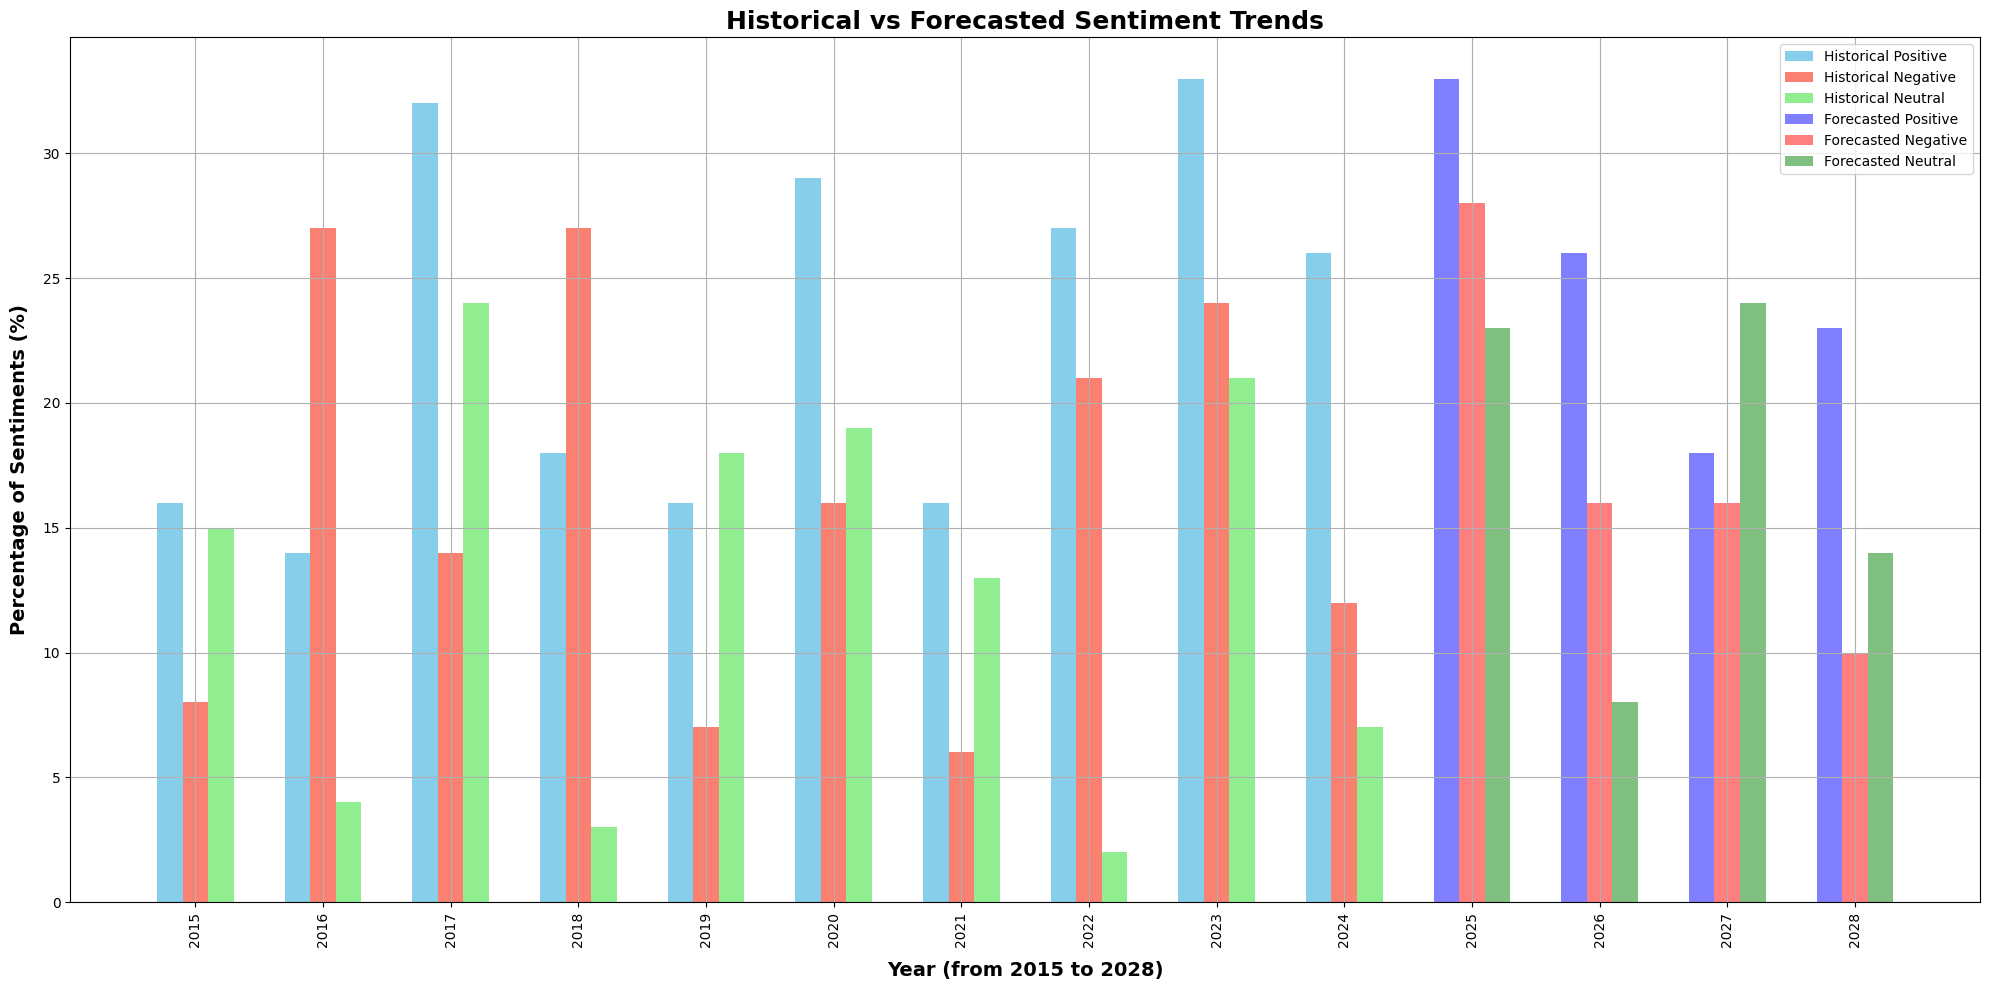

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create an example dataframe
years = np.arange(2015, 2029)
historical_data = {
    'Positive': np.random.randint(10, 35, len(years)-4),
    'Negative': np.random.randint(5, 30, len(years)-4),
    'Neutral': np.random.randint(0, 25, len(years)-4)
}
forecast_data = {
    'Positive': np.random.randint(15, 35, 4),
    'Negative': np.random.randint(10, 30, 4),
    'Neutral': np.random.randint(5, 25, 4)
}

historical_sentiments = pd.DataFrame(historical_data, index=years[:-4])
forecast_sentiments = pd.DataFrame(forecast_data, index=years[-4:])

fig, ax = plt.subplots(figsize=(20, 10))

# Historical Bars
ax.bar(historical_sentiments.index - 0.2, historical_sentiments['Positive'], width=0.2, color='skyblue', label='Historical Positive')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], width=0.2, color='salmon', label='Historical Negative')
ax.bar(historical_sentiments.index + 0.2, historical_sentiments['Neutral'], width=0.2, color='lightgreen', label='Historical Neutral')

# Forecast Bars
ax.bar(forecast_sentiments.index - 0.2, forecast_sentiments['Positive'], width=0.2, color='blue', alpha=0.5, label='Forecasted Positive')
ax.bar(forecast_sentiments.index, forecast_sentiments['Negative'], width=0.2, color='red', alpha=0.5, label='Forecasted Negative')
ax.bar(forecast_sentiments.index + 0.2, forecast_sentiments['Neutral'], width=0.2, color='green', alpha=0.5, label='Forecasted Neutral')


# Set x-ticks to be every year, assuming there are no gaps in the years
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=90)

# Set labels and title
ax.set_xlabel('Year (from 2015 to 2028)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Percentage of Sentiments (%)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Historical vs Forecasted Sentiment Trends', fontsize=18, fontweight='bold')

# Enable grid and legend
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:

ax.bar(historical_sentiments.index - 0.2, historical_sentiments['Positive'], width=0.2, color='skyblue', align='center', label='Historical Positive Sentiment')
ax.bar(historical_sentiments.index, historical_sentiments['Negative'], width=0.2, color='salmon', align='center', label='Historical Negative Sentiment')
ax.bar(historical_sentiments.index + 0.2, historical_sentiments['Neutral'], width=0.2, color='lightgreen', align='center', label='Historical Neutral Sentiment')



ax.plot(historical_sentiments.index, historical_sentiments['Positive'], color='blue', marker='o', linestyle='-', label='Historical Positive Trend')
ax.plot(historical_sentiments.index, historical_sentiments['Negative'], color='red', marker='o', linestyle='-', label='Historical Negative Trend')
ax.plot(historical_sentiments.index, historical_sentiments['Neutral'], color='green', marker='o', linestyle='-', label='Historical Neutral Trend')

In [ ]:
from prophet import Prophet

# Function to prepare the data for the Prophet model
def prepare_data_for_prophet(data, sentiment):
    yearly_data = data[data['Sentiment'] == sentiment].groupby(data['Tweet_Timestamp'].dt.year).size()
    yearly_total = data.groupby(data['Tweet_Timestamp'].dt.year).size()
    yearly_percentage = (yearly_data / yearly_total) * 100
    df_prophet = pd.DataFrame({'ds': yearly_percentage.index, 'y': yearly_percentage.values})
    return df_prophet

# Preparing data for each sentiment
positive_data = prepare_data_for_prophet(data, 'Positive')
neutral_data = prepare_data_for_prophet(data, 'Neutral')
negative_data = prepare_data_for_prophet(data, 'Negative')

# Function to fit and forecast using the Prophet model
def fit_and_forecast(df):
    model = Prophet(interval_width=0.95)  # 95% prediction intervals
    model.fit(df)
    future = model.make_future_dataframe(periods=9, freq='Y')  # Creating future dates for prediction (2019-2027)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Fit and forecast for each sentiment
forecast_positive = fit_and_forecast(positive_data)
forecast_neutral = fit_and_forecast(neutral_data)
forecast_negative = fit_and_forecast(negative_data)

# Merge forecasts to compare
forecast_combined = forecast_positive[['ds', 'yhat']].rename(columns={'yhat': 'Positive'})
forecast_combined = forecast_combined.merge(
    forecast_neutral[['ds', 'yhat']].rename(columns={'yhat': 'Neutral'}), on='ds', how='left')
forecast_combined = forecast_combined.merge(
    forecast_negative[['ds', 'yhat']].rename(columns={'yhat': 'Negative'}), on='ds', how='left')

forecast_combined.head()

KeyError: 'Sentiment'